In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NumberSpins = 5

In [110]:
Jij = np.random.random((NumberSpins,NumberSpins)) * 2 - 1

# Set diagonal to zero
for i in range(NumberSpins):
   Jij[i,i] = 0

# Make symmetric
for i in range(NumberSpins):
   for j in range(i):
      Jij[i,j] = Jij[j,i]

## Integer to binary sequence

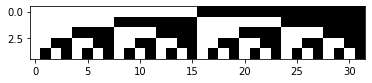

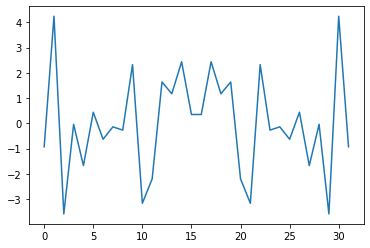

In [111]:
Spin = np.zeros([NumberSpins,1], dtype=int)
SpinArray = np.zeros([NumberSpins,2**NumberSpins], dtype=int)
EnergyArray = np.zeros(2**NumberSpins)

for i in range(2**NumberSpins):
    S = np.array([int(x) for x in np.binary_repr(i, width=NumberSpins)])
    Spin[:,0] = S[:]
    Spin = 2*Spin - 1
    SpinArray[:,i] = Spin[:,0]
    EnergyArray[i] = -0.5 * np.matmul(Spin.transpose(), np.matmul(Jij, Spin))

plt.imshow(SpinArray, cmap='Greys', interpolation='nearest')
plt.show()

plt.plot(EnergyArray)
plt.show()

## Single spin-flip sequence

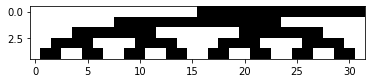

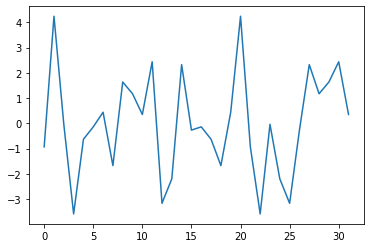

In [112]:
# Gary code generator
SS = np.zeros(NumberSpins, dtype=int)

for i in range(2**NumberSpins):
    S = np.array([int(x) for x in np.binary_repr(i, width=NumberSpins)])
    
    for j in range(1,NumberSpins):
        SS[j] = S[j] ^ S[(j-1)]

    SS[0] = S[0]

    Spin[:,0] = SS[:]
    Spin = 2*Spin - 1
    SpinArray[:,i] = Spin[:,0]
    EnergyArray[i] = -0.5 * np.matmul(Spin.transpose(), np.matmul(Jij, Spin))

plt.imshow(SpinArray, cmap='Greys', interpolation='nearest')
plt.show()

plt.plot(EnergyArray)
plt.show()

## Hebb rule to store one pattern

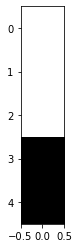

In [7]:
BinMemory = ( np.random.random([NumberSpins,1]) > 0.5 )
Memory = BinMemory * 2 - 1

plt.imshow(Memory, cmap='Greys', interpolation='nearest')
plt.show()

In [9]:
Jij = 1/NumberSpins * np.matmul(Memory, Memory.transpose())

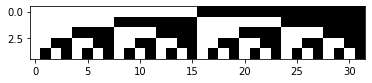

[3]


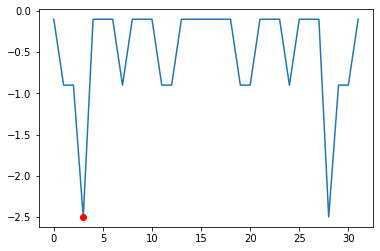

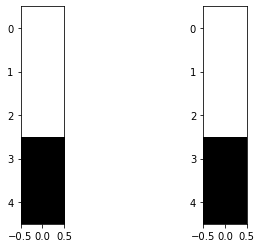

In [10]:
Spin = np.zeros([NumberSpins,1], dtype=int)
SpinArray = np.zeros([NumberSpins,2**NumberSpins], dtype=int)
EnergyArray = np.zeros(2**NumberSpins)

for i in range(2**NumberSpins):
    S = np.array([int(x) for x in np.binary_repr(i, width=NumberSpins)])
    Spin[:,0] = S[:]
    Spin = 2*Spin - 1
    SpinArray[:,i] = Spin[:,0]
    EnergyArray[i] = -0.5 * np.matmul(Spin.transpose(), np.matmul(Jij, Spin))

plt.imshow(SpinArray, cmap='Greys', interpolation='nearest')
plt.show()

MemoryNumber = BinMemory.transpose().dot(2**np.arange(NumberSpins)[::-1])
print(MemoryNumber)

plt.plot(EnergyArray)
plt.plot(MemoryNumber, EnergyArray[MemoryNumber], 'ro')
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].imshow(Memory, cmap='Greys', interpolation='nearest')
ax[1].imshow(SpinArray[:,MemoryNumber], cmap='Greys', interpolation='nearest')
plt.show()


## Hebb rule to store "MemorySize" memory

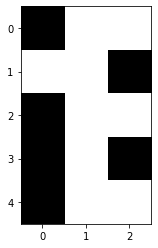

In [12]:
MemorySize = 3

BinMemory = ( np.random.random([NumberSpins,MemorySize]) > 0.5 )
Memory = BinMemory * 2 - 1

plt.imshow(Memory, cmap='Greys', interpolation='nearest')
plt.show()

In [14]:
Jij = 1/NumberSpins * np.matmul(Memory, Memory.transpose())

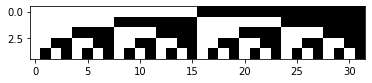

[23  0 10]


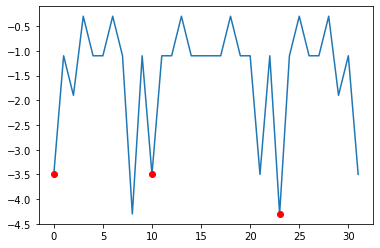

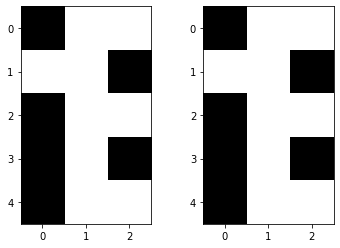

In [15]:
Spin = np.zeros([NumberSpins,1], dtype=int)
SpinArray = np.zeros([NumberSpins,2**NumberSpins], dtype=int)
EnergyArray = np.zeros(2**NumberSpins)

for i in range(2**NumberSpins):
    S = np.array([int(x) for x in np.binary_repr(i, width=NumberSpins)])
    Spin[:,0] = S[:]
    Spin = 2*Spin - 1
    SpinArray[:,i] = Spin[:,0]
    EnergyArray[i] = -0.5 * np.matmul(Spin.transpose(), np.matmul(Jij, Spin))

plt.imshow(SpinArray, cmap='Greys', interpolation='nearest')
plt.show()

MemoryNumber = BinMemory.transpose().dot(2**np.arange(NumberSpins)[::-1])
print(MemoryNumber)

plt.plot(EnergyArray)
plt.plot(MemoryNumber, EnergyArray[MemoryNumber], 'ro')
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].imshow(Memory, cmap='Greys', interpolation='nearest')
ax[1].imshow(SpinArray[:,MemoryNumber], cmap='Greys', interpolation='nearest')
plt.show()

## Finding the single-flip neighbors

[[ 2]
 [26]
 [22]
 [16]
 [19]]


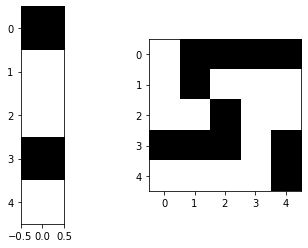

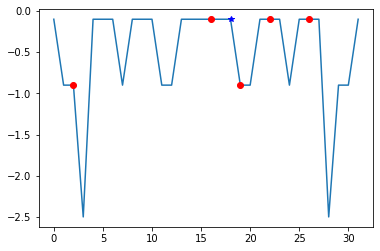

In [11]:
MemoryNumber = 18

Spin = SpinArray[:,MemoryNumber]

SpinNeighbor = np.zeros([NumberSpins,NumberSpins], dtype=int)
MemoryNumberNeighbor = np.zeros([NumberSpins,1], dtype=int)

for i in range(NumberSpins):
    SpinNeighbor[:,i] = Spin[:]
    SpinNeighbor[i,i] = Spin[i] * -1

    BinMemoryNeighbor = ( SpinNeighbor[:,i] > 0 ) * 1

    MemoryNumberNeighbor[i,0] = BinMemoryNeighbor.transpose().dot(2**np.arange(NumberSpins)[::-1])
    
print(MemoryNumberNeighbor)

fig, ax = plt.subplots(1,2)
SS = np.zeros([NumberSpins,1], dtype=int)
SS[:,0] = SpinArray[:,MemoryNumber]
ax[0].imshow(SS, cmap='Greys', interpolation='nearest')
ax[1].imshow(SpinNeighbor, cmap='Greys', interpolation='nearest')
plt.show()

plt.plot(EnergyArray)

for i in range(NumberSpins):
    plt.plot(MemoryNumberNeighbor[i], EnergyArray[MemoryNumberNeighbor[i]], 'ro')

plt.plot(MemoryNumber, EnergyArray[MemoryNumber], 'b*')
plt.show()